In [7]:
!pip uninstall prophet
!pip install pystan==2.19.1.1 prophet


^C


In [1]:
from prophet import Prophet

# Data processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv("./users/we1775srv$.csv")

df['datetime'] = pd.to_datetime(df['time'])
df['timestamp'] = df["datetime"].values.astype(np.int64)/1000000000
df.to_csv('./users/we1775srv$.csv', index=False)
df.tail(20)

C:\Users\hesha\IdeaProjects\Compromise Assessment\venv\lib\site-packages\dateutil\parser\_parser.py:1212: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,Unnamed: 0,time,Process Creation,Authorization Policy Change,Process Termination,Logoff,Special Logon,Logon,Removable Storage,Sensitive Privilege Use,File System,File Share,Detailed File Share,Registry,Security Group Management,Security State Change,Other Logon/Logoff Events,Security System Extension,datetime,timestamp
605,605,2016-08-28 15:35:48.000 MDT,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 15:35:48,1.472399e+09
606,606,2016-08-28 15:46:53.000 MDT,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 15:46:53,1.472399e+09
607,607,2016-08-28 15:54:25.000 MDT,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 15:54:25,1.472400e+09
608,608,2016-08-28 16:08:21.000 MDT,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 16:08:21,1.472401e+09
609,609,2016-08-28 16:19:03.000 MDT,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 16:19:03,1.472401e+09
610,610,2016-08-28 16:21:11.000 MDT,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 16:21:11,1.472401e+09
611,611,2016-08-28 16:21:30.000 MDT,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 16:21:30,1.472401e+09
612,612,2016-08-28 16:36:56.000 MDT,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 16:36:56,1.472402e+09
613,613,2016-08-28 16:37:50.000 MDT,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 16:37:50,1.472402e+09
614,614,2016-08-28 16:39:29.000 MDT,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-08-28 16:39:29,1.472402e+09


In [4]:
Event = pd.read_csv("./users/we1775srv$.csv")

times = Event['timestamp']

In [5]:

from datetime import datetime

frames=0
start_time=times[0]
end_time=start_time + (1*60*60)
event_log={}

for time in times:
    current_time=time


    if current_time < end_time and start_time in event_log:
        event_log[start_time]=event_log[start_time]+1
    elif current_time < end_time:
        event_log[start_time]=1
    else:
        start_time = current_time
        end_time=start_time + (1*60*60)
        event_log[start_time]=1


time=[]
counts=[]
for key,value in event_log.items():
    time.append(datetime.fromtimestamp(key))
    counts.append(value)

# importing the module
# print(event_log)
dict = {'ds': time, 'y': counts}

df = pd.DataFrame(dict)

# saving the dataframe
df.to_csv('time.csv')


In [19]:
df1 = pd.read_csv('time.csv')
cols = ['y', 'y1', 'y2', 'y3']

df1['y'] = df1[cols].sum(axis=1)

df1.info()

df1.drop(['Unnamed: 0', 'y1', 'y2', 'y3'], axis = 1, inplace = True)
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  65 non-null     int64 
 1   ds          65 non-null     object
 2   y           65 non-null     int64 
 3   y1          65 non-null     int64 
 4   y2          65 non-null     int64 
 5   y3          65 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.2+ KB


,ds,y
0,8/25/2016 23:59,24
1,8/26/2016 1:00,28
2,8/26/2016 2:02,44
3,8/26/2016 3:07,28
4,8/26/2016 4:10,40
...,...,...
60,8/28/2016 17:32,36
61,8/28/2016 18:33,32
62,8/28/2016 19:38,52
63,8/28/2016 20:46,40


In [20]:
# Add seasonality
model = Prophet(interval_width=0.99)

# Fit the model on the training dataset
model.fit(df1)

16:32:18 - cmdstanpy - INFO - Chain [1] start processing
16:32:18 - cmdstanpy - INFO - Chain [1] done processing


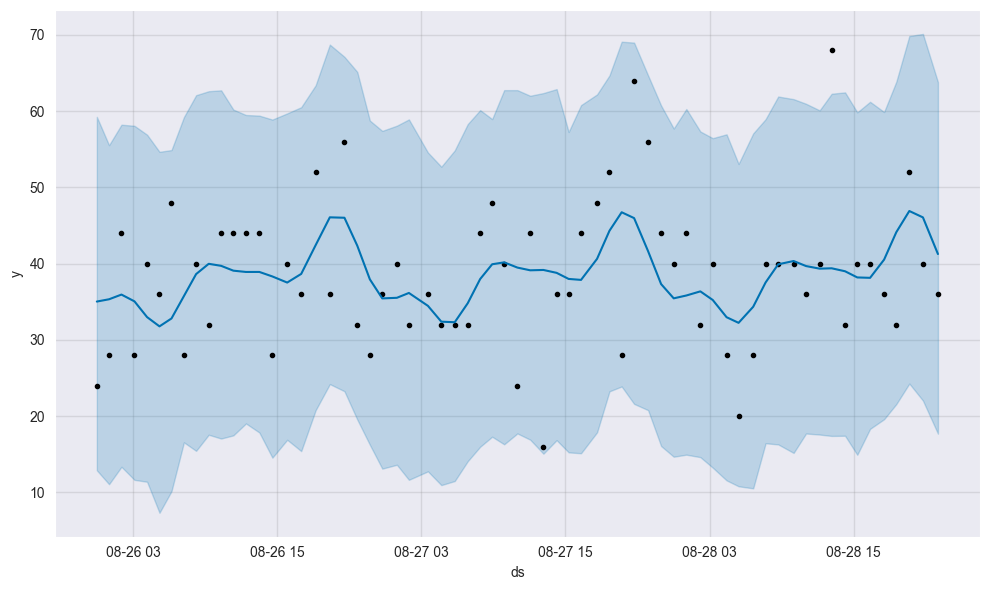

In [21]:
forecast = model.predict(df1)

# Visualize the forecast
model.plot(forecast); #

In [23]:
df1.tail(20)

# df['ds']=df['ds'].astype(str)

,ds,y
45,8/28/2016 1:04,44
46,8/28/2016 2:14,32
47,8/28/2016 3:16,40
48,8/28/2016 4:25,28
49,8/28/2016 5:25,20
50,8/28/2016 6:38,28
51,8/28/2016 7:40,40
52,8/28/2016 8:43,40
53,8/28/2016 10:00,40
54,8/28/2016 11:02,36


In [24]:
# Merge actual and predicted values


performance =pd.concat([df1, forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']]],
                  axis = 1)
# performance = pd.merge(df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')
performance


,ds,y,yhat,yhat_lower,yhat_upper
0,8/25/2016 23:59,24,35.024206,12.900229,59.240460
1,8/26/2016 1:00,28,35.324105,11.078827,55.526647
2,8/26/2016 2:02,44,35.939922,13.361110,58.210397
3,8/26/2016 3:07,28,35.050620,11.648694,58.066617
4,8/26/2016 4:10,40,32.985606,11.397710,56.900725
...,...,...,...,...,...
60,8/28/2016 17:32,36,40.521655,19.599978,59.876109
61,8/28/2016 18:33,32,44.119693,21.578740,63.852624
62,8/28/2016 19:38,52,46.895705,24.270373,69.835527
63,8/28/2016 20:46,40,46.059489,22.042574,70.110599


In [25]:
# Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')

# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 6.809575686313484
The MAPE for the model is 0.1975535544686355


In [26]:
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)

# Check the number of anomalies
performance['anomaly'].value_counts()

0    64
1     1
Name: anomaly, dtype: int64

In [27]:
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
56,8/28/2016 13:10,68,39.386478,17.406968,62.270009,1


<AxesSubplot:xlabel='ds', ylabel='y'>

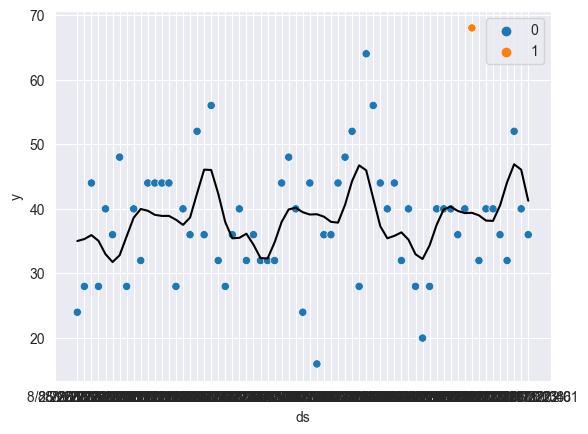

In [28]:
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')